# Librarys

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import make_interp_spline, BSpline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Upload the Dataset

In [193]:
df= pd.read_csv('C:/Users/hp/OneDrive/Documentos/DAA/DAAProject/ramen-ratings.csv')

# Data Exploration

In [194]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [197]:
df.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2580,41
unique,NaN,355,2413,7,38,51,38
top,NaN,Nissin,Beef,Pack,Japan,4,\n
freq,NaN,381,7,1531,352,384,4
mean,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,744.926171,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,645.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
df.isna().any()

Review #    False
Brand       False
Variety     False
Style        True
Country     False
Stars       False
Top Ten      True
dtype: bool

# Data Preparation

In [199]:
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [200]:
#print(df['Brand'])
df['Brand'].unique()

array(['New Touch', 'Just Way', 'Nissin', 'Wei Lih', "Ching's Secret",
       'Samyang Foods', 'Acecook', 'Ikeda Shoku', "Ripe'n'Dry", 'KOKA',
       'Tao Kae Noi', 'Yamachan', 'Nongshim', 'TRDP', 'Binh Tay', 'Paldo',
       'Jackpot Teriyaki', 'Yum-Mie', 'MyKuali', 'Ottogi',
       'Sichuan Guangyou', 'Lipton', 'Lele', 'Fujiwara', 'Uni-President',
       'Maruchan', 'Prima', 'Sokensha', 'Takamori', 'Guava Story',
       'Samurai Ramen', 'Ogasawara', 'Pringles', "Mom's Dry Noodle",
       'Maggi', 'Indomie', 'Happy Cook', 'The Ramen Rater Select', 'TTL',
       'E-Zee', 'Kiki Noodle', 'Tokyo Noodle', 'GGE', 'Myojo', 'Sau Tao',
       'Wang', 'Daifuku', 'Master Kong', "World O' Noodle", 'Kang Shi Fu',
       'Mum Ngon', 'Fashion Food', 'Dream Kitchen', 'Ajinatori',
       "Dr. McDougall's", 'Ve Wong', 'Super Bihun', 'Xiuhe',
       'Little Cook', 'Shirakiku', "Mama Pat's", 'Goku-Uma',
       'Sichuan Baijia', 'Liang Cheng Mai', 'Gefen', 'Hua Feng',
       'Pulmuone', 'Liu Quan', 'Daikok

In [201]:
df['Brand']= df['Brand'].replace(['New Touch', 'Just Way', 'Nissin', 'Wei Lih', "Ching's Secret",
       'Samyang Foods', 'Acecook', 'Ikeda Shoku', "Ripe'n'Dry", 'KOKA',
       'Tao Kae Noi', 'Yamachan', 'Nongshim', 'TRDP', 'Binh Tay', 'Paldo',
       'Jackpot Teriyaki', 'Yum-Mie', 'MyKuali', 'Ottogi',
       'Sichuan Guangyou', 'Lipton', 'Lele', 'Fujiwara', 'Uni-President',
       'Maruchan', 'Prima', 'Sokensha', 'Takamori', 'Guava Story',
       'Samurai Ramen', 'Ogasawara', 'Pringles', "Mom's Dry Noodle",
       'Maggi', 'Indomie', 'Happy Cook', 'The Ramen Rater Select', 'TTL',
       'E-Zee', 'Kiki Noodle', 'Tokyo Noodle', 'GGE', 'Myojo', 'Sau Tao',
       'Wang', 'Daifuku', 'Master Kong', "World O' Noodle", 'Kang Shi Fu',
       'Mum Ngon', 'Fashion Food', 'Dream Kitchen', 'Ajinatori',
       "Dr. McDougall's", 'Ve Wong', 'Super Bihun', 'Xiuhe',
       'Little Cook', 'Shirakiku', "Mama Pat's", 'Goku-Uma',
       'Sichuan Baijia', 'Liang Cheng Mai', 'Gefen', 'Hua Feng',
       'Pulmuone', 'Liu Quan', 'Daikoku', 'Chuan Wei Wang', 'Wai Wai',
       'Kamfen', 'Marutai', 'Vifon', '1 To 3 Noodles', 'Fantastic',
       'Knorr', 'Sempio', 'Patanjali', 'Qin Zong', 'Pran',
       'Sapporo Ichiban', 'MAMA', 'Xiao Ban Mian', 'Suimin', 'Cintan',
       'JML', 'Unif Tung-I', 'Tablemark', "Farmer's Heart", 'Fuku',
       'Singa-Me', 'Love Cook', 'Great Value', 'Asian Thai Foods',
       'Nagatanien', 'Nyor Nyar', 'Tseng Noodles', 'A-Sha Dry Noodle',
       'Morre', 'Roland', "Mr. Lee's Noodles", 'Choumama',
       'President Rice', 'Happy Family', 'Menraku', 'La Moderna',
       'Jingqi', 'Thien Houng Foods', 'Doll', 'Four Seas', 'CarJEN',
       '7 Select', 'Oni Hot Pot', 'Weh Lih', 'Itomen', 'Sanpo',
       'Mi Sedaap', 'Tokushima Seifun', 'Mamee', 'Zow Zow', 'Koyo',
       'ORee Garden', 'A1', 'Migawon', "Chaudhary's Wai Wai",
       'Urban Noodle', 'Trident', 'Conimex', 'Prima Taste', 'MyOri',
       'Itsuki', 'Kabuto Noodles', 'IbuRamen', 'Koh Thai', 'Bamee',
       'Ibumie', 'Unox', 'Fortune', 'Bonasia', 'Mie Sedaap', 'iMee',
       'Thai Smile', 'Asia Gold', 'Pirkka', 'Higashimaru', 'Kuriki',
       'Vedan', 'Yum Yum', 'Mama', 'Baijia', 'Daraz', 'Pama', 'Seven & I',
       'Forest Noodles', "Vit's", 'Ten-In', 'Sugakiya Foods', 'Hao Way',
       'Nakaya Shouten', 'Thai Chef', 'Crystal Noodle', 'Azami', 'Super',
       'Torishi', 'Western Family', 'Chering Chang', 'Ishimaru',
       'Authentically Asian', 'Aroi', 'Koka', 'Wu-Mu', 'Yamadai',
       'Vina Acecook', 'Baixiang Noodles', 'Salam Mie', 'Lee Fah Mee',
       'Sakurai Foods', 'The Kitchen Food', 'Premiere', '7 Select/Nissin',
       'Wugudaochang', 'Emart', 'Lishan Food Manufacturing', 'Ah Lai',
       'Tropicana Slim', 'A-One', 'Deshome', 'Paldo Vina', 'Chencun',
       'United', 'ChoripDong', 'Shan', 'Ruski', 'No Name', 'New Way',
       'Lucky Me!', "Campbell's", 'One Dish Asia', 'Long Jun Hang',
       'Unif-100', 'Hankow', 'The Bridge', 'Mitoku', 'Unzen', 'Uncle Sun',
       'Mi E-Zee', 'E-mi', 'J.J.', 'Curry Prince', 'Econsave', 'Oyatsu',
       'Kin-Dee', 'Ko-Lee', 'ICA', 'Nanyang Chef', 'Thai Pavilion',
       'Miliket', 'Katoz', 'Men-Sunaoshi', 'Chewy', 'Adabi',
       'Osaka Ramen', "Sainsbury's", 'Pamana', "Annie Chun's", 'La Fonte',
       'Thai Choice', 'Tesco', 'Pop Bihun', 'Snapdragon', 'Saji',
       'Miracle Noodle', 'Tiger Tiger', 'Takamori Kosan', 'Papa',
       'Sawadee', 'Golden Wheat', 'Lotus Foods', 'Plats Du Chef',
       'Batchelors', 'Sakura Noodle', 'Unif', 'Hi-Myon', 'Healtimie',
       'Thai Kitchen', 'Mr. Noodles', 'Good Tto Leu Foods', 'GaGa',
       'Kimura', 'Tokachimen Koubou', 'ABC', 'Eat & Go', 'President',
       'SuperMi', 'Kumamoto', 'HoMyeonDang', 'Nan Jie Cun', 'China Best',
       'Sanrio', 'Peyang', 'Golden Wonder', 'Komforte Chockolates',
       'Nagao Noodle', 'Maitri', 'GS25', 'Baltix', 'Amianda',
       'Tasty Bite', 'Star Anise Foods', 'Tradition', 'Amino',
       'Pot Noodle', 'Sun Noodle', 'S&S', 'Springlife', 'Right Foods',
       'Sunlee', 'Goku Uma', 'Daddy', "Han's South Korea", 'Sarimi',
       'FMF', 'Long Kow', 'Unif / Tung-I', 'Song Hak', 'Fuji Mengyo',
       'Dragonfly', 'CJ CheilJedang', 'Dongwon', 'Seven-Eleven', 'Souper',
       "Kim's Bowl", 'Ohsung', 'Gau Do', 'Golden Mie', 'GreeNoodle',
       'Kailo', 'Fashion Foods', 'Hosoonyi', 'Payless', 'Yamamoto',
       'Saigon Ve Wong', 'Wu Mu', 'Mee Jang', 'JFC', 'Samyang',
       'Mug Shot', 'Lishan', 'Cap Atoom Bulan', 'Sura', 'Wei Chuan',
       'Yamamori', 'Mr. Udon', 'Omachi', 'Wei Wei', 'Six Fortune',
       'Haioreum', 'Sunlight', 'Noah Foods', 'O Sung', 'Foodmon',
       'Sahmyook', 'Nan Hsing', 'Mexi-Ramen', 'Hsin Tung Yang', 'Sao Tao',
       'iNoodle', 'Quickchow', 'Chikara', 'Q', 'Noodle Time', 'Gomex',
       'US Canning', 'Rhee Bros Assi', 'Bon Go Jang', 'Tayho',
       'Sunny Maid', 'Royal Umbrella', 'Tiger',
       'Fu Chang Chinese Noodle Company', 'Sanyo Foods', 'Rocket Brand',
       'Boss', 'Chorip Dong', 'Higashi', 'Sakurai', 'Global Inspiration',
       'Teriyaki Time', 'Hua Feng Noodle Expert', 'Kim Ve Wong', 'Smack',
       'Sutah', 'Tung-I', 'Westbrae'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,
                                       28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,
                                        53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,
                                       79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,
                                       104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,
                                        124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,
                                       144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,
                                       165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,
                                       186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,
                                       204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,
                                        224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,
                                       244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,
                                       265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,
                                       286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,
                                       304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,
                                        324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,
                                       344,345,346,347,348,349,350,351,352,353,354,355])

In [305]:
print(df['Brand'])

0         1
1         2
2         3
3         4
4         5
       ... 
2575     74
2576     71
2577     71
2578     71
2579    355
Name: Brand, Length: 2580, dtype: int64


In [203]:
values= {'Style': df.Style.mode()[0]}
df.fillna(value=values, inplace=True)

In [204]:
df['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

In [205]:
df['Style']= df['Style'].replace(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], [1,2,3,4,5,6,7])
print(df['Style'].unique())
print(df['Style'])

[1 2 3 4 5 6 7]
0       1
1       2
2       1
3       2
4       2
       ..
2575    4
2576    2
2577    2
2578    2
2579    2
Name: Style, Length: 2580, dtype: int64


In [206]:
df['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [208]:
df['Country']= df['Country'].replace(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38])


print(df['Country'].unique())
print(df['Country'])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
0       1
1       2
2       3
3       2
4       4
       ..
2575    9
2576    7
2577    7
2578    7
2579    3
Name: Country, Length: 2580, dtype: int64


In [209]:
df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [210]:
df['Stars']= df['Stars'].replace(['Unrated'],[0])

In [211]:
df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 0, '1.5', '3.25', '2', '0', '3', '0.5',
       '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3', '4.0',
       '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1', '0.9',
       '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8', '3.7',
       '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [212]:
dfr= df.drop(['Review #','Top Ten', 'Variety'], axis=1)
dfr.head()

,Brand,Style,Country,Stars
0,1,1,1,3.75
1,2,2,2,1
2,3,1,3,2.25
3,4,2,2,2.75
4,5,2,4,3.75


In [213]:
dfr.isna().sum()

Brand      0
Style      0
Country    0
Stars      0
dtype: int64

In [214]:
dfr.groupby(by=['Stars']).mean()

,Brand,Style,Country
Stars,,,
0,77.666667,2.000000,7.000000
0,145.500000,2.346154,9.230769
0.1,150.000000,2.000000,7.000000
0.25,166.727273,2.181818,11.272727
0.5,192.214286,2.357143,15.714286
0.75,132.000000,2.000000,1.000000
0.9,71.000000,2.000000,7.000000
1,121.961538,2.115385,9.384615
1.1,20.000000,2.000000,5.000000


In [215]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Brand    2580 non-null   int64 
 1   Style    2580 non-null   int64 
 2   Country  2580 non-null   int64 
 3   Stars    2580 non-null   object
dtypes: int64(3), object(1)
memory usage: 80.8+ KB


In [216]:
dfr['Stars']= pd.to_numeric(dfr['Stars'], errors= 'coerce')

In [235]:
def starcla(Stars):
    if (Stars>=0) and (Stars<=0.5):
        return 0
    elif (Stars>=0.5) and (Stars<=1.5):
        return 1
    elif (Stars>=1.5) and (Stars<=2.5):
        return 2
    elif (Stars>=2.5) and (Stars<=3.5):
        return 3
    elif (Stars>=3.5) and (Stars<=4.5):
        return 4
    elif (Stars>=4.5) and (Stars<=5):
        return 5

In [236]:
dfr['Stars']= dfr['Stars'].apply(starcla)

In [237]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Brand    2580 non-null   int64
 1   Style    2580 non-null   int64
 2   Country  2580 non-null   int64
 3   Stars    2580 non-null   int64
dtypes: int64(4)
memory usage: 80.8 KB


<AxesSubplot:xlabel='Stars', ylabel='Count'>

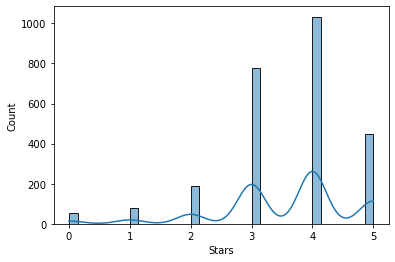

In [238]:
sns.histplot(dfr['Stars'], kde=True)

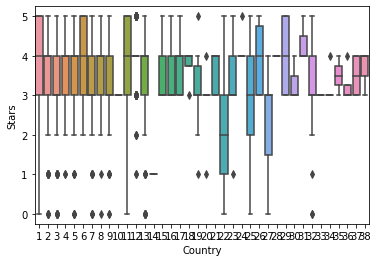

In [239]:
te= sns.boxplot(x=dfr['Country'],y=dfr['Stars'] )

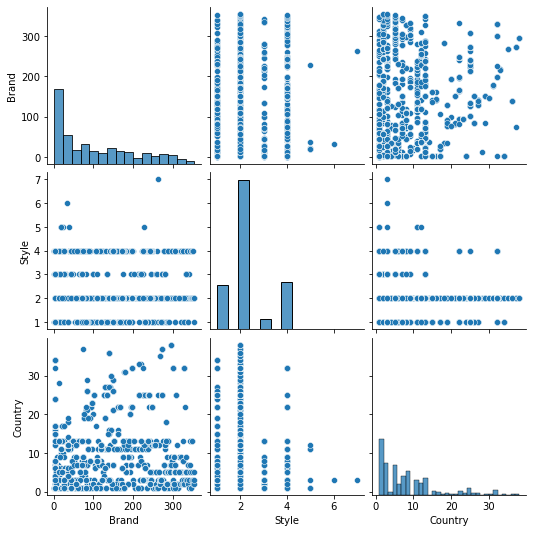

In [240]:
'''
Scatter plots
'''

cols= ['Brand', 'Style','Country', 'Stars']
graf=sns.pairplot(df[cols], height=2.5)

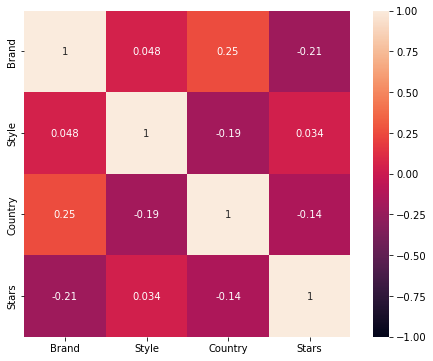

In [241]:
corr_matrix= dfr.corr()
a, b= plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmin= -1, vmax= 1, square=True, annot=True);

In [276]:
x= dfr.drop(['Stars'], axis=1)
y=dfr['Stars'].to_frame()

In [277]:
x.head()

,Brand,Style,Country
0,1,1,1
1,2,2,2
2,3,1,3
3,4,2,2
4,5,2,4


In [278]:
y

,Stars
0,4
1,1
2,2
3,3
4,4
...,...
2575,3
2576,1
2577,2
2578,2


# First Model Logistic Regression

In [287]:
scalerx= preprocessing.StandardScaler().fit(x)
x_scaled= scalerx.transform(x)
scalery= preprocessing.StandardScaler().fit(y)
y_scaled= scalery.transform(y)

In [291]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size= 0.30, random_state= 2021)

In [292]:
#logmodel= LogisticRegression(solver= 'lbfgs', max_iter=1000)
logmodel= LogisticRegression(solver= 'lbfgs', max_iter=1000)
logmodel.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=1000)

In [293]:
predictions= logmodel.predict(x_test)

In [294]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        50
           3       0.38      0.20      0.26       218
           4       0.42      0.88      0.57       317
           5       0.00      0.00      0.00       151

    accuracy                           0.41       774
   macro avg       0.13      0.18      0.14       774
weighted avg       0.28      0.41      0.31       774



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


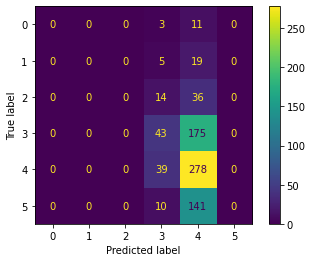

In [295]:
plot_confusion_matrix(logmodel, x_test, y_test)
plt.show()

# Second Model Decision Tree

In [296]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 2021)
print(" The shape of x %s. x_train has shape %s while x_test has shape %s" %(x.shape, x_train.shape, x_test.shape))
print(" The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

 The shape of x (2580, 3). x_train has shape (1806, 3) while x_test has shape (774, 3)
 The shape of y (2580, 1). y_train has shape (1806, 1) while y_test has shape (774, 1)


In [297]:
clf= DecisionTreeClassifier(random_state=2021)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [298]:
predictions = clf.predict(x_test)
predictions

array([4, 3, 5, 3, 3, 4, 4, 4, 4, 1, 4, 4, 0, 2, 5, 0, 5, 4, 4, 5, 3, 5,
       5, 2, 3, 4, 3, 3, 1, 5, 4, 5, 4, 5, 4, 4, 4, 3, 3, 3, 2, 3, 4, 4,
       5, 3, 4, 2, 4, 5, 4, 2, 4, 4, 3, 3, 0, 4, 3, 3, 4, 3, 3, 4, 5, 4,
       4, 4, 4, 4, 4, 4, 1, 3, 5, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 3,
       2, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 3, 5, 4, 3, 3, 3, 3, 3,
       4, 1, 2, 4, 4, 4, 3, 3, 4, 4, 4, 3, 1, 3, 5, 3, 3, 5, 4, 5, 3, 5,
       3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 4,
       4, 4, 4, 3, 5, 5, 3, 4, 4, 4, 5, 3, 5, 4, 3, 3, 3, 4, 5, 4, 1, 4,
       3, 4, 4, 5, 3, 5, 4, 1, 3, 5, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 2,
       3, 1, 3, 4, 3, 4, 0, 5, 5, 3, 4, 1, 3, 4, 4, 5, 4, 3, 2, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 4, 3, 3, 4, 1,
       3, 4, 4, 3, 5, 4, 4, 3, 2, 4, 4, 5, 0, 4, 4, 3, 0, 3, 3, 4, 5, 5,
       3, 4, 3, 4, 4, 3, 4, 4, 0, 4, 4, 3, 4, 5, 4, 4, 5, 5, 4, 4, 3, 3,
       4, 3, 4, 4, 3, 3, 5, 4, 4, 4, 4, 3, 4, 3, 3,

In [299]:
confusion_matrix(y_test, predictions)

array([[  4,   1,   2,   6,   1,   0],
       [  2,   1,   2,  14,   4,   1],
       [  1,   3,   8,  22,  15,   1],
       [  6,   5,   8, 104,  81,  14],
       [  2,   4,  16,  96, 166,  33],
       [  1,   0,   4,  38,  68,  40]], dtype=int64)

In [300]:
accuracy_score(y_test, predictions)

0.417312661498708

In [301]:
precision_score(y_test, predictions, average='micro')

0.417312661498708

In [304]:
scores = cross_val_score(clf, x, y, cv=100)
print(scores)
print("Result: %0.2f accuracy of standard deviation of % 0.2f" %(scores.mean(), scores.std()))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 55 members, which is less than n_splits=100.
  warnings.warn(("The least populated class in y has only %d"


[0.30769231 0.38461538 0.30769231 0.23076923 0.5        0.46153846
 0.46153846 0.42307692 0.46153846 0.26923077 0.38461538 0.38461538
 0.38461538 0.42307692 0.30769231 0.53846154 0.42307692 0.30769231
 0.26923077 0.42307692 0.69230769 0.5        0.34615385 0.5
 0.26923077 0.5        0.46153846 0.19230769 0.26923077 0.23076923
 0.34615385 0.30769231 0.30769231 0.34615385 0.5        0.34615385
 0.38461538 0.30769231 0.34615385 0.38461538 0.38461538 0.30769231
 0.53846154 0.53846154 0.53846154 0.5        0.30769231 0.5
 0.26923077 0.46153846 0.65384615 0.53846154 0.46153846 0.38461538
 0.46153846 0.26923077 0.46153846 0.5        0.30769231 0.46153846
 0.53846154 0.5        0.53846154 0.5        0.30769231 0.5
 0.38461538 0.42307692 0.34615385 0.42307692 0.30769231 0.46153846
 0.5        0.46153846 0.34615385 0.46153846 0.46153846 0.46153846
 0.38461538 0.30769231 0.36       0.4        0.48       0.4
 0.52       0.24       0.48       0.52       0.4        0.24
 0.2        0.4        0.24  